# CS345 Spring 2024 Project - Gabriel Schonacher

In [93]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

## Part 1 How well do Perceptrons classify

Evaluate the perceptron algorithm (the implementation provided in the lecture notebook) on the Haberman's dataset provided in the last assignment and the Breast Cancer Wisconsin (diagnostic) dataset provided by Scikit. Compare its accuracy against the SVC implementation (use default values for C). Perform a tenfold cross-validation and report the average and standard deviation for each classifier on each dataset. Since you might not be able to get the perceptron code in the lecture notebook to play well with the Sklearn cross-validation code, you can implement the cross-validation code simply using nested for loops. Is there a classifier among the two that appears to perform better? Provide a discussion of the observations you see.

Make sure to allow the perceptron algorithm to run for a sufficient number of epochs

Reminder : [Notebook for cross validation](https://github.com/sarathsreedharan/CS345/blob/master/spring24/notebooks/module05_02_cross_validation.ipynb )

Note: Please remember that the perceptron expects labels to be 1 and -1. If the dataset doesn't provide labels in that form, you must first convert it into that form.

### Note on presenting the results
You can consider using panda dataframes to present your results

In [95]:
habber_man = "haberman.csv"

hbLoad = pd.read_csv(habber_man)

hbLoad_array = np.array(hbLoad)

np.random.shuffle(hbLoad_array)

print(np.shape(hbLoad_array))

X = np.array(hbLoad_array[:, :-1])
y = np.array(hbLoad_array[:, -1])

X.shape, y.shape

(305, 4)


((305, 3), (305,))

In [96]:
y = np.where(y == 1, 1, -1)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=5)

p = perceptron(iterations = 250, learning_rate = 0.1)
p.fit(X_train, y_train)
y_pred = p.predict(X_test)

p_hb_mean = np.mean(y_test == y_pred)
p_hb_std = np.std(y_test == y_pred)

print("Perceptron Habber-man Average: ", p_hb_mean)
print("Perceptron Habber-man Standard Deviation: ", p_hb_std)

Perceptron Habber-man Average:  0.31521739130434784
Perceptron Habber-man Standard Deviation:  0.4646023972426633


In [97]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=5)

svm_classifer = SVC(kernel="linear")

svm_classifer.fit(X_train, y_train)
y_pred = svm_classifer.predict(X_test)

p_hb_mean = np.mean(y_test == y_pred)
p_hb_std = np.std(y_test == y_pred)

print("SVM Habber-man Average: ", p_hb_mean)
print("SVM Habber-man Standard Deviation: ", p_hb_std)

SVM Habber-man Average:  0.6847826086956522
SVM Habber-man Standard Deviation:  0.4646023972426633


In [98]:
kf_classifer = KFold(n_splits=10,shuffle=True,random_state=5)

hb_average = []

for i, (train, test) in enumerate(kf_classifer.split(X)):
    X_train, X_test = X[train], X[test]
    y_train, y_test = y[train], y[test]
    
    p = perceptron(iterations=250, learning_rate=0.01)
    p.fit(X_train, y_train)
    y_pred = p.predict(X_test)
    av = np.mean(y_test == y_pred)
    hb_average.append(av)

ten_hab_average = np.mean(hb_average)

print("10 fold for Habberman Dataset with Perceptron", ten_hab_average)

10 fold for Habberman Dataset with Perceptron 0.7310752688172044


In [99]:
kf_classifer = KFold(n_splits=10,shuffle=True,random_state=5)

hb_average = []

for i, (train, test) in enumerate(kf_classifer.split(X)):
    X_train, X_test = X[train], X[test]
    y_train, y_test = y[train], y[test]
    
    svm_classifer = SVC(kernel="linear")
    svm_classifer.fit(X_train, y_train)
    y_pred = svm_classifer.predict(X_test)
    av = np.mean(y_test == y_pred)
    hb_average.append(av)

ten_hab_average = np.mean(hb_average)

print("10 fold for Habberman Dataset with SVC", ten_hab_average)

10 fold for Habberman Dataset with SVC 0.7213978494623656


In [100]:
data = load_breast_cancer()

X = data.data
y = data.target

y = np.where(y == 1, 1, -1)

X.shape, y.shape

((569, 30), (569,))

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, 
                                                    random_state=0)

svm_classifer = SVC(kernel="linear")

svm_classifer.fit(X_train, y_train)
y_pred = svm_classifer.predict(X_test)

breast_cancer_average = np.mean(y_pred == y_test)
breast_cancer_standard_deviation = np.std(y_pred == y_test)

print("SVM Breast Cancer Average: ", breast_cancer_average)
print("SVM Breast Cacner Standard Deviation: ", breast_cancer_standard_deviation)

SVM Breast Cancer Average:  0.9736842105263158
SVM Breast Cacner Standard Deviation:  0.16007269816574263


In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, 
                                                    random_state=0)

p = perceptron(iterations = 250, learning_rate = 0.1)
p.fit(X_train, y_train)
y_pred = p.predict(X_test)

breast_cancer_average = np.mean(y_pred == y_test)
breast_cancer_standard_deviation = np.std(y_pred == y_test)

print("Perceptron Breast Cancer Average: ", breast_cancer_average)
print("Perceptron Breast Cacner Standard Deviation: ", breast_cancer_standard_deviation)

Perceptron Breast Cancer Average:  0.9035087719298246
Perceptron Breast Cacner Standard Deviation:  0.29526373122292693


In [103]:
kf_classifer = KFold(n_splits=10,shuffle=True,random_state=5)

breCan_average = []

for i, (train, test) in enumerate(kf_classifer.split(X)):
    X_train, X_test = X[train], X[test]
    y_train, y_test = y[train], y[test]
    
    svm_classifer = SVC(kernel="linear")
    svm_classifer.fit(X_train, y_train)
    y_pred = svm_classifer.predict(X_test)
    av = np.mean(y_test == y_pred)
    breCan_average.append(av)

ten_breCan_average = np.mean(breCan_average)

print("10 fold for Breast Cancer Dataset with SVC", ten_breCan_average)

10 fold for Breast Cancer Dataset with SVC 0.9541666666666668


In [104]:
kf_classifer = KFold(n_splits=10,shuffle=True,random_state=5)

breCan_average = []

for i, (train, test) in enumerate(kf_classifer.split(X)):
    X_train, X_test = X[train], X[test]
    y_train, y_test = y[train], y[test]
    
    p_classifer = perceptron(iterations=1000, learning_rate=0.02, seed=5)
    p_classifer.fit(X_train, y_train)
    y_pred = p_classifer.predict(X_test)
    av = np.mean(y_test == y_pred)
    breCan_average.append(av)

ten_breCan_average = np.mean(breCan_average)

print("10 fold for Breast Cancer Dataset with Preceptron", ten_breCan_average)

10 fold for Breast Cancer Dataset with Preceptron 0.8961466165413535


*Discussion of the results here*.


*The Habber-Man Average is lower than the Breast Cancer data set, and the Standard Deviation is higher in the higher in the Habber-man dataset than the Breast Cancer dataset making the Breast Cancer dataset having more consistency. While the Standard Deviation in the Habber-man data is higher, suggesting that it has higher variabilty than the Breast Cancer dataset. While the 10 Fold for Breast cancer test for the preceptron and the SVC is relativley higher than the perceptron. While for the Habberman data set in regards to the 10 Fold, it is higher of an accuracy for the SVC compared to the perceptron*.

## Part 2 - Learning Curve

We looked briefly at the idea of learning curves in the notebook for cross-validation. It looked at how accuracy changed with respect to the number of training examples. In this part of the assignment, plot a learning curve for the perceptron algorithm for an increasing number of training examples. To plot this, 
1. First, create a held-out validation set against which you will be comparing all your trained models
2. Now, from the remaining data set, create train sets of increasing sizes. To create more compact plots you can use a logarithmic scale like 10, 20, 40, 80, 160, etc..

For the plot X-axis should be the training data size considered and the Y-axis should be the accuracy of the model (obtained by training on the dataset of that size) as measured on the held-out validation set.  

After receiving the plot, make sure to discuss your observations about the plot

In [105]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()

X = data.data
y = data.target

y = np.where(y == 1, 1, -1)

X.shape, y.shape


((569, 30), (569,))

In [106]:
X_full_train, X_test, y_full_train, y_test = train_test_split(
    X, y, test_size = len(y)-max(training_sizes), 
    stratify=y, random_state=1)

print(f'We have selected {X_test.shape[0]} test images from {X.shape[0]} images total.')
print(f'The remaining {X_full_train.shape[0]} images are available for training.')

We have selected 409 test images from 569 images total.
The remaining 160 images are available for training.


In [107]:
training_sizes = [10, 20, 40, 80, 160]

accuracy = []

for training_size in training_sizes:
    X_train,_ , y_train,_ = train_test_split(
        X_full_train, y_full_train, test_size=len(y_full_train)-training_size+5, 
        stratify=y_full_train, random_state=42)
    p_classifer = perceptron(iterations=500, learning_rate=0.2, seed=12)
    p_classifer.fit(X_train, y_train)
    y_pred = p_classifer.predict(X_test)
    accuracy.append(np.sum((y_pred==y_test))/len(y_test))
    print(f'training size: {X_train.shape[0]} \t accuracy: {accuracy[-1]:5.3f}')

training size: 5 	 accuracy: 0.780
training size: 15 	 accuracy: 0.738
training size: 35 	 accuracy: 0.885
training size: 75 	 accuracy: 0.919
training size: 155 	 accuracy: 0.914


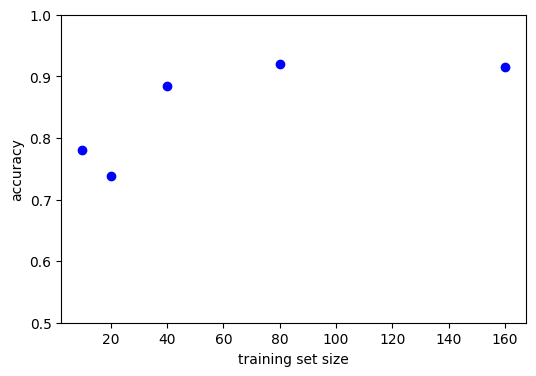

In [108]:
plt.figure(figsize=(6,4))
plt.plot(training_sizes, accuracy, 'ob')
plt.xlabel('training set size')
plt.ylabel('accuracy')
plt.ylim(0.5,1);

*Discussion of the plot here*.



## Part 3 - Standardization

Scaling your features is a core part of pre-processing data. One of the methods we have already seen in detail is that of [normalization](https://github.com/sarathsreedharan/CS345/blob/master/spring24/notebooks/module01_03_dot_products.ipynb). However, there are other methods. A popular one is called standardization. Under this method, you update each feature value such that it has zero mean and unit variation.

You can find the details on how to do this at the following [wikipedia page](https://en.wikipedia.org/wiki/Feature_scaling#Standardization_(Z-score_Normalization)). Now, in this part, you have to implement the code to perform standardization (do not use the Sklearn function for it).

1. Use that code on the Haberman's Dataset. Show how the mean of resultant feature values is zero and the standard deviation is one. Note that the method is applied across each individual feature. So, for a data matrix, the mean of the column is zero, and the standard deviation is one.
2. Compare the accuracy obtained from Perceptron on Haberman's dataset, with and without standardization. As before, use tenfold cross-validation to compute accuracy and report the accuracy the same way you did for Part 1. Provide a small discussion on the results you see.

In [148]:
# Your code for standardization and it's application on the Haberman's dataset
habber_man = "haberman.csv"

hbLoad = pd.read_csv(habber_man)

hbLoad_array = np.array(hbLoad)

np.random.shuffle(hbLoad_array)

print(np.shape(hbLoad_array))

X = np.array(hbLoad_array[:, :-1])
y = np.array(hbLoad_array[:, -1])
y = np.where(y == 1, 1, -1)

X.shape, y.shape

(305, 4)


((305, 3), (305,))

In [149]:
X = (X - np.mean(X, axis=0))/np.std(X, axis=0)

X = pd.DataFrame(X, columns = ["Age", "Year", "Node"])
y = pd.DataFrame(y, columns = ["Dead/Alive"])

hb_standardization = pd.concat([X, y], axis=1)

hb_standardization.describe().round(2)

,Age,Year,Node,Dead/Alive
count,305.00,305.00,305.00,305.00
mean,0.00,0.00,-0.00,0.47
std,1.00,1.00,1.00,0.88
min,-2.10,-1.49,-0.56,-1.00
25%,-0.80,-0.88,-0.56,-1.00
50%,-0.05,0.05,-0.42,1.00
75%,0.79,0.97,-0.01,1.00
max,2.84,1.89,6.67,1.00


In [178]:
hb_standardization = np.array(hb_standardization)

np.random.shuffle(hb_standardization)

print(np.shape(hb_standardization))


X = np.array(hb_standardization[:, :-1])
y = np.array(hb_standardization[:, -1])

(305, 4)


In [179]:
# Your code to evaluate perceptron on a standardized and non-standardized dataset

In [180]:
accuracy = []

kf_classifer = KFold(n_splits=10, shuffle=True,random_state=5)

for i, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    p_classifer = perceptron(iterations=500, learning_rate=0.02)
    p_classifer.fit(X_train, y_train)
    y_pred = p_classifer.predict(X_test)
    acc = np.mean(y_test == y_pred)
    accuracy.append(acc)

p_hb_mean_standardization = np.mean(accuracy)

print("10 fold for Habberman Dataset with Preceptron & Standardization", p_hb_mean_standardization)

10 fold for Habberman Dataset with Preceptron & Standardization 0.6458064516129032


In [181]:
kf_classifer = KFold(n_splits=10,shuffle=True,random_state=5)

hb_average = []

for i, (train, test) in enumerate(kf_classifer.split(X)):
    X_train, X_test = X[train], X[test]
    y_train, y_test = y[train], y[test]
    
    p = perceptron(iterations=250, learning_rate=0.01)
    p.fit(X_train, y_train)
    y_pred = p.predict(X_test)
    av = np.mean(y_test == y_pred)
    hb_average.append(av)

ten_hab_average = np.mean(hb_average)

print("10 fold for Habberman Dataset with Perceptron", ten_hab_average)

10 fold for Habberman Dataset with Perceptron 0.6226881720430107


*Discussion of the results comparing perceptron on the two datset goes here*.

Standarization was higher by 0.002-0.02 compared to the 10 fold with the perceptron, with both numbers side by side.

### Grading 

Although we will not grade on a 100 pt scale, the following is a sample grading sheet that will give you a basic weightage of the different questions:  

```
Grading sheet for assignment 1

Part 1:  40 points.
  Fixing labels: 10
  Cross-validation code: 20
  Comparison, reporting, and discussion: 20
Part 2:  20 points.
  Creation of the learning curve: 10 points
  Discussion of the plot: 10 points
Part 3:  40 points
  Standardization code and demonstrating it on the dataset: 20 points
  Comparison, reporting, and discussion: 20 points
```